In [13]:
import pandas as pd

df = pd.read_csv('./data/digit-recognizer/train.csv')

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [15]:
df.shape

(42000, 785)

In [16]:
X = df.drop("label", axis=1)
y = df["label"]

print(type(X))

<class 'pandas.core.frame.DataFrame'>


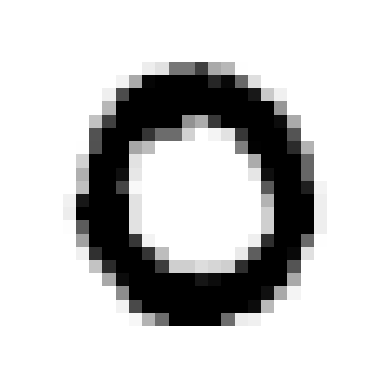

Digit is: 0


In [73]:
import matplotlib.pyplot as plt


def plot_digit(image_data):
    if isinstance(image_data, np.ndarray):  # Check if input is a numpy array
        image = image_data.reshape(28, 28)
    else:
        image = image_data.to_numpy().reshape(28, 28)

    plt.imshow(image, cmap="binary")
    plt.axis("off")


digit = X.iloc[1]
plot_digit(digit)
plt.show()

print(f"Digit is: {y[1]}")

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Training a Binary Digit Classifier

# The 0 detector
y_train_0 = y_train == 0
y_test_0 = y_test == 0

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([digit])

c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [22]:
# Performance Measures

# Accuracy is not ideal for classifiers
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.98607143, 0.9875    , 0.98794643])

In [23]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_0, y_train_pred)
cm

array([[30034,   250],
       [  181,  3135]])

In [25]:
# precision = 3135 / 3135 + 250 = 0.926
# recall = 3135 / 3135 + 181 = 0.945
from sklearn.metrics import precision_score, recall_score

print(f"PRECISION: {precision_score(y_train_0, y_train_pred)}")
print(f"RECALL: {recall_score(y_train_0, y_train_pred)}")

PRECISION: 0.9261447562776958
RECALL: 0.945416164053076


In [26]:
from sklearn.metrics import f1_score

print(f"F1 SCORE: {f1_score(y_train_0, y_train_pred)}")

F1 SCORE: 0.9356812416057305


In [27]:
# The Precision/Recall Tradeoff
y_scores = sgd_clf.decision_function([digit])
print(y_scores)

threshold = 60000
y_digit_pred = y_scores > threshold
print(y_digit_pred)

[54302.79922191]
[False]


c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [28]:
# How to determine the threshold
# First use cross_val_predict and return the scores
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_0, cv=3, method="decision_function"
)

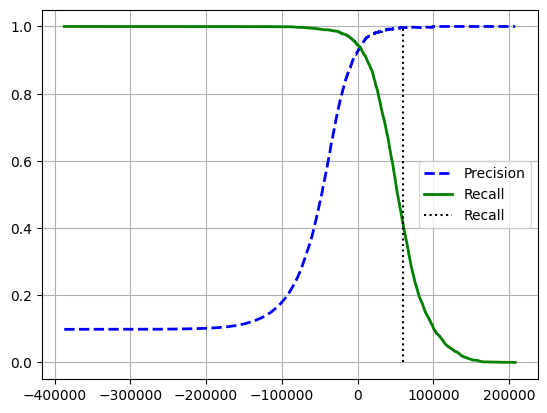

<Figure size 3000x480 with 0 Axes>

In [29]:
# Use the precision_recall_curve to compute the precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Recall")
plt.legend(loc="center right")
plt.grid()
plt.figure().set_figwidth(30)
plt.show()


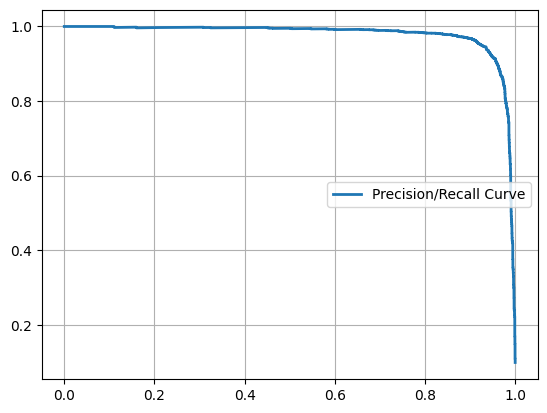

<Figure size 3000x480 with 0 Axes>

In [30]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.legend(loc="center right")
plt.grid()
plt.figure().set_figwidth(30)
plt.show()

In [31]:
# Find lowest threshold with 90% precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(f"Threshold for 90% precision: {threshold_for_90_precision}")

Threshold for 90% precision: -6314.648630308888


In [32]:
y_train_pred_90 = y_scores >= threshold_for_90_precision

print(f"Precision Score: {precision_score(y_train_0, y_train_pred_90)}")
print(f"Recall Score: {recall_score(y_train_0, y_train_pred_90)}")

Precision Score: 0.9001979078314957
Recall Score: 0.9601930036188179


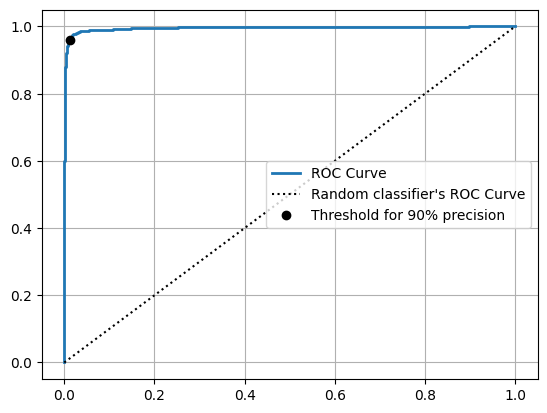

<Figure size 3000x480 with 0 Axes>

In [33]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend(loc="center right")
plt.grid()
plt.figure().set_figwidth(30)
plt.show()

In [34]:
# Measure ROC AUC
from sklearn.metrics import roc_auc_score

print(f"Area under curve for roc: {roc_auc_score(y_train_0, y_scores)}")

Area under curve for roc: 0.9959716493272612


In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_prob_forest = cross_val_predict(
    forest_clf, X_train, y_train_0, cv=3, method="predict_proba"
)

y_prob_forest[:2]

array([[1.  , 0.  ],
       [0.97, 0.03]])

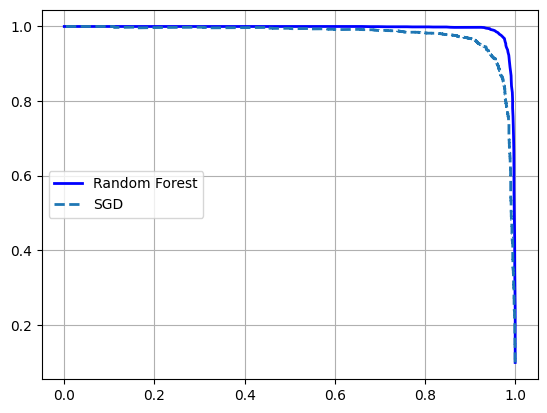

<Figure size 3000x480 with 0 Axes>

In [36]:
y_scores_forest = y_prob_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_0, y_scores_forest
)

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend(loc="center left")
plt.grid()
plt.figure().set_figwidth(30)
plt.show()

In [37]:
y_train_pred_forest = y_prob_forest[:, 1] >= 0.5
print(f"F1 Score: {f1_score(y_train_0, y_train_pred_forest)}")
print(f"ROC AUC Score: {roc_auc_score(y_train_0, y_scores_forest)}")

F1 Score: 0.9682000617474529
ROC AUC Score: 0.9991060053687177


In [38]:
# Using OvR or OvO Classifier Score
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)

svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [39]:
svm_clf.predict([digit])

digit_scores = svm_clf.decision_function([digit])
print(digit_scores.round(2))

[[ 9.31 -0.3   8.28  4.03  0.72  7.22  5.08  1.75  6.08  2.81]]


c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [40]:
class_id = digit_scores.argmax()
print(class_id)

0


In [41]:
print(svm_clf.classes_)

print(svm_clf.classes_[class_id])

[0 1 2 3 4 5 6 7 8 9]
0


In [42]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

print(ovr_clf.predict([digit]))

[0]


c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\bring\Documents\

In [43]:
len(ovr_clf.estimators_)

10

In [44]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([digit]))

[0]


c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(sgd_clf.decision_function([digit]).round(2))

[[  65741.6  -244597.46  -14977.81  -34548.73  -86141.46  -30897.46
   -44216.1   -58031.78  -16982.82  -24156.82]]


c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [46]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88035714, 0.87214286, 0.87      ])

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.89732143, 0.90964286, 0.91142857])

c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\bring\Documents\kaggle_competitions\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


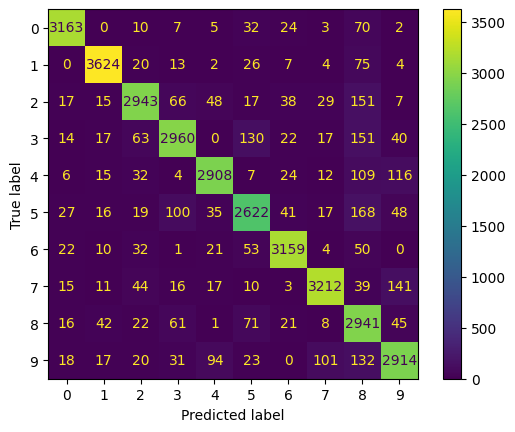

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


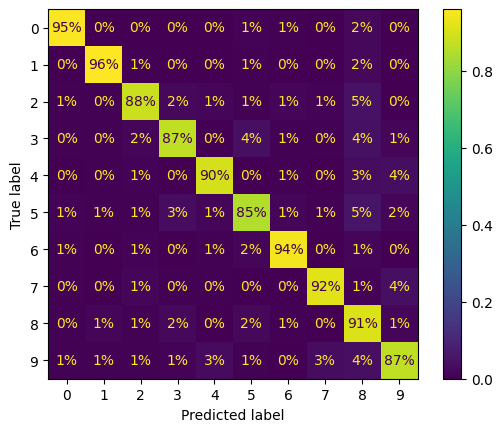

In [49]:
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, normalize="true", values_format=".0%"
)
plt.show()

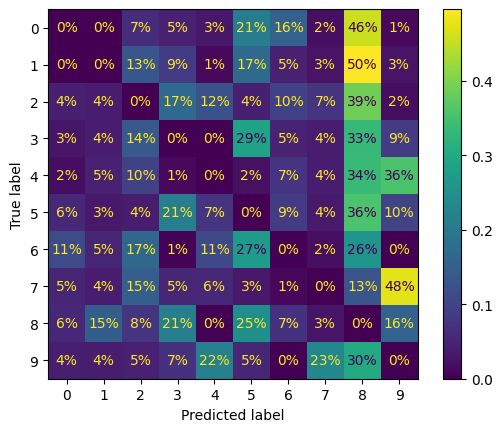

In [50]:
sample_weight = y_train_pred != y_train
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    sample_weight=sample_weight,
    normalize="true",
    values_format=".0%",
)

plt.show()

x_aa length: 3624
x_ab length: 75
x_ba length: 42
x_bb length: 2941


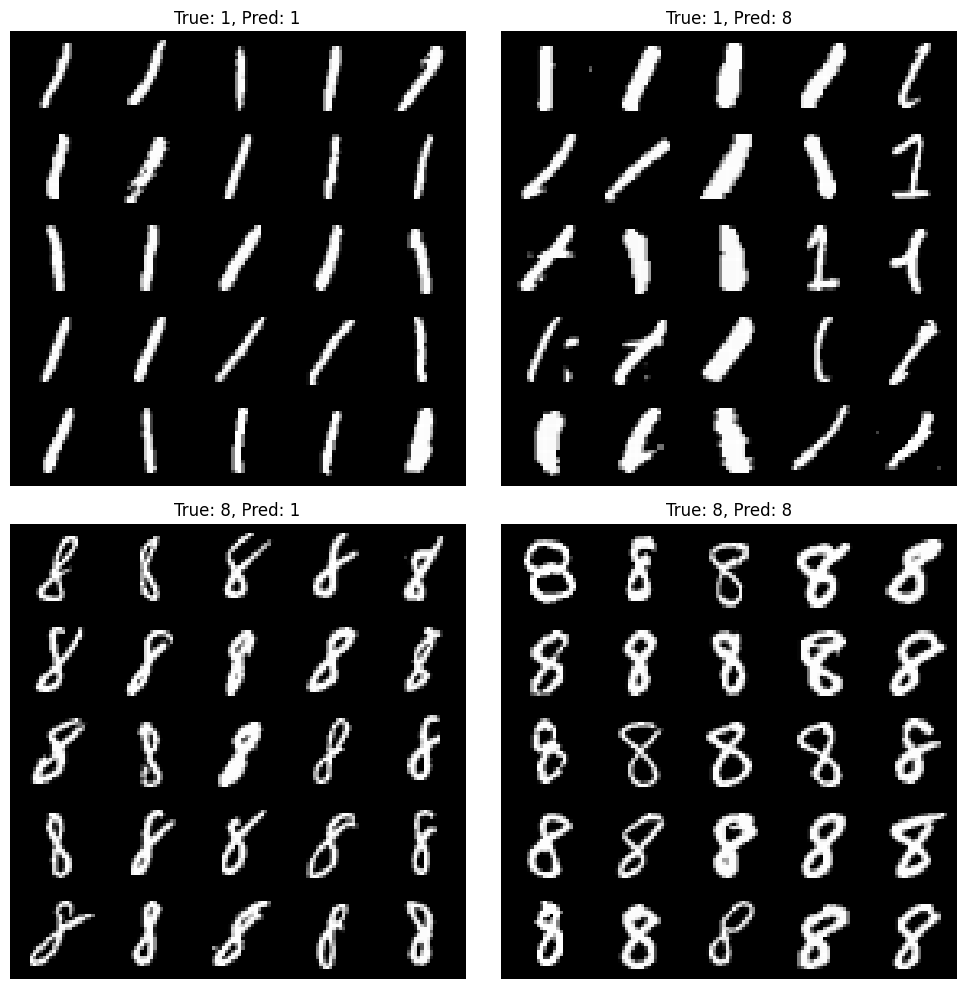

In [51]:
import matplotlib.pyplot as plt
import numpy as np


def plot_digits(instances, images_per_row=10, size=28, **options):
    if len(instances) == 0:
        plt.axis("off")
        plt.text(
            0.5,
            0.5,
            "No data",
            horizontalalignment="center",
            verticalalignment="center",
        )
        return

    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images += [np.zeros((size, size))] * n_empty
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="gray", **options)
    plt.axis("off")


cl_a, cl_b = 1, 8

X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)

y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

print(f"x_aa length: {len(x_aa)}")
print(f"x_ab length: {len(x_ab)}")
print(f"x_ba length: {len(x_ba)}")
print(f"x_bb length: {len(x_bb)}")

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plot_digits(x_aa[:25], images_per_row=5)
plt.title(f"True: {cl_a}, Pred: {cl_a}")

plt.subplot(2, 2, 2)
plot_digits(x_ab[:25], images_per_row=5)
plt.title(f"True: {cl_a}, Pred: {cl_b}")

plt.subplot(2, 2, 3)
plot_digits(x_ba[:25], images_per_row=5)
plt.title(f"True: {cl_b}, Pred: {cl_a}")

plt.subplot(2, 2, 4)
plot_digits(x_bb[:25], images_per_row=5)
plt.title(f"True: {cl_b}, Pred: {cl_b}")

plt.tight_layout()
plt.show()


In [54]:
# Multilabel Classification. Should attatch a tag to a recognized class
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([digit])

array([[False, False]])

In [56]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f"F1 Score: {f1_score(y_multilabel, y_train_knn_pred, average='weighted')}")

F1 Score: 0.9744919989343319


In [59]:
# To use multilabel classification on a model that doesn't nativley support it you can use a chain classifier to capture dependencies between labels
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

chain_clf.predict([digit])

array([[0., 0.]])

In [65]:
# Multioutput Classification
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

print(X_test_mod)

y_train_mod = X_train
y_test_mod = X_test

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
5457       70      50      86      60      89      47      59      74       2   
38509      73      17      88      13      79      22      82      97      69   
25536       6       9      50      14      56      38      76      17      64   
31803       2      34      87      12      10      97      50       1      67   
39863      39      99      66      91      99      16      66      75      86   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
8388       16      70      27      71      50      20      51      64       3   
29359      30      26      30      50      13      69      39      50      55   
40276      24      31      68      35      68      95      70      70      46   
18421      93      38      95      73      37      56       7      64      71   
4335       63      83       9       7      94      33      22      18      42   

       pixel9  ...  pixel77

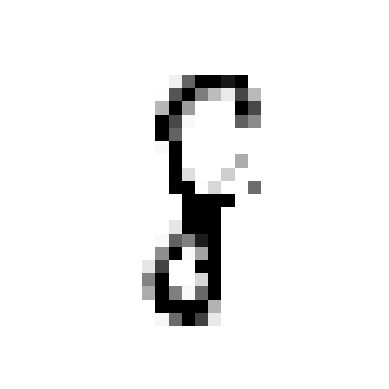

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])
plot_digit(clean_digit)
plt.show()